In [276]:
import pandas as pd

In [277]:
# read built dataset
df = pd.read_csv('../../datasets/built_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475428 entries, 0 to 475427
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   item_name                  475428 non-null  object 
 1   category_name              475428 non-null  object 
 2   date                       475428 non-null  object 
 3   time                       475428 non-null  object 
 4   item_code                  475428 non-null  int64  
 5   quantity_sold_kg           475428 non-null  float64
 6   unit_selling_price_rmb/kg  475428 non-null  float64
 7   sale_or_return             475428 non-null  object 
 8   discount                   475428 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 32.6+ MB


In [278]:
# drop non-dependant columns
df = df.drop(columns=['item_code', 'discount'])
df.sample(2)

,item_name,category_name,date,time,quantity_sold_kg,unit_selling_price_rmb/kg,sale_or_return
159016,xixia mushroom,mushroom,2021-07-25,12:30:56.108,0.315,21.6,sale
357276,millet pepper,capsicum,2022-07-02,17:50:27.419,0.091,29.6,sale


<Axes: >

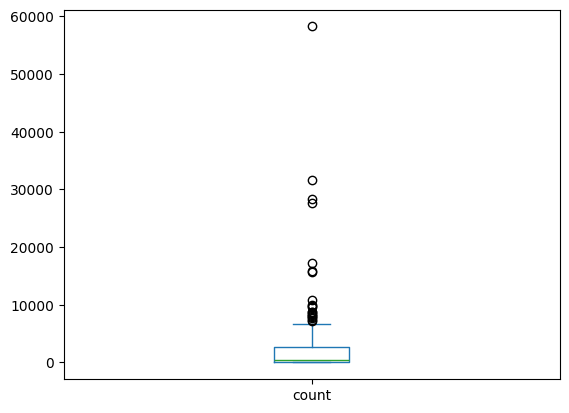

In [279]:
# visualise frequency of selling an item
df['item_name'].value_counts().plot.box()

In [280]:
"""according to the above boxplot there are some items that are sold more than 5000 times. 
    they can be considered as hot selling items and no need to predict a discount on them"""

# drop hot selling items
(df['item_name'].value_counts() > 2000).sum()

53

In [281]:
import numpy as np

In [282]:
# rename top selling items as 'Other'
filt = (df['item_name'].value_counts() > 2000)
df['item_name'] = np.where(filt[df['item_name'].values], 'Other', df['item_name'])
filt = df['item_name'] == 'Other'
df = df.loc[~filt]

df['item_name'].unique().shape[0]

124

<Axes: >

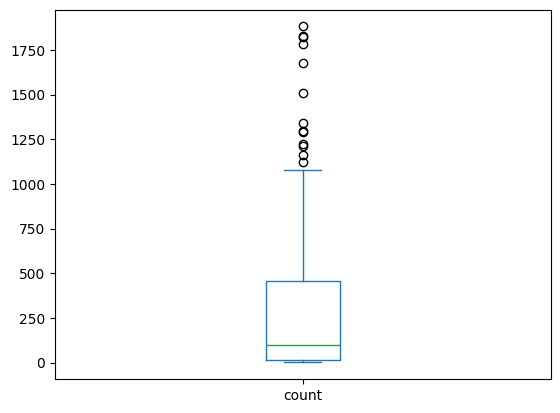

In [283]:
# visualise frequency of selling for rest of items
df['item_name'].value_counts().plot.box()

<Axes: >

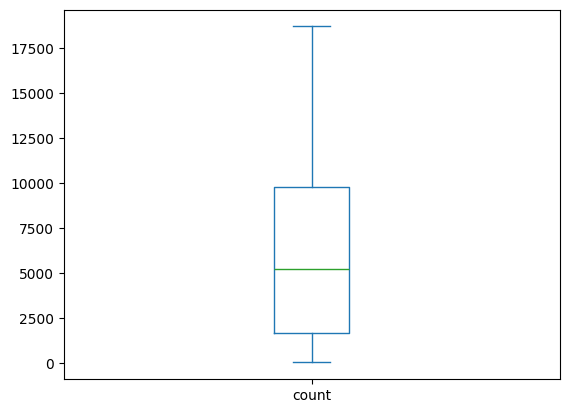

In [284]:
# visualise frequency of selling an category
df['category_name'].value_counts().plot.box()

In [285]:
# check wheather (-) values of sold amount are returned items
(df['quantity_sold_kg'] < 0).sum() == (df['sale_or_return'] == 'return').sum()

True

In [286]:
# remove returned item records
filt = (df['sale_or_return'] == 'return')
df = df.loc[~filt]

df = df.drop(columns=['sale_or_return'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40936 entries, 10 to 475427
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_name                  40936 non-null  object 
 1   category_name              40936 non-null  object 
 2   date                       40936 non-null  object 
 3   time                       40936 non-null  object 
 4   quantity_sold_kg           40936 non-null  float64
 5   unit_selling_price_rmb/kg  40936 non-null  float64
dtypes: float64(2), object(4)
memory usage: 2.2+ MB


In [287]:
# check if there are 0 sold amounts
(df['quantity_sold_kg'] == 0).sum()

0

<Axes: >

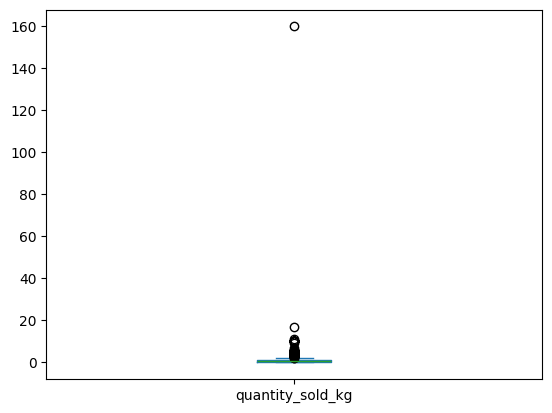

In [288]:
# visualise sold amount
df['quantity_sold_kg'].plot.box()

In [289]:
# check the mean of sold amount
np.mean(df['quantity_sold_kg'])

0.6290846443228453

In [290]:
"""according to the above boxplot there are only few purchases that are sold more than 12.5 kg. in general 12.5 kg is very uncommon to buy in a single time and can consider them as outliers. so handle them with mean values."""

# handle outlier with mean values
filt = df['quantity_sold_kg'] > 120
df = df[~filt]

# check the change of mean
np.mean(df['quantity_sold_kg']), df['quantity_sold_kg'].max()

(0.625191376572615, 17.0)

<Axes: >

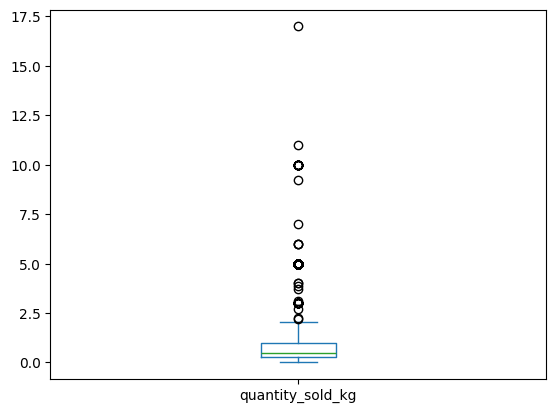

In [291]:
# visualise sold amount
df['quantity_sold_kg'].plot.box()

<Axes: >

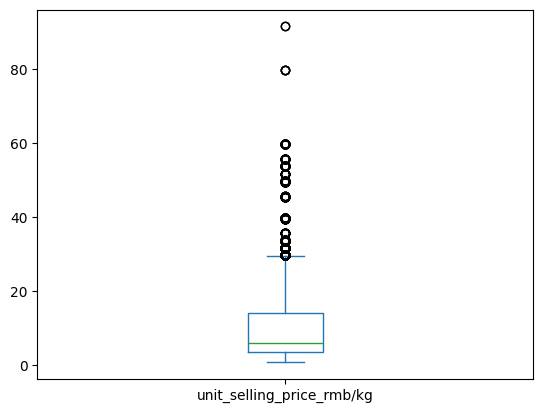

In [292]:
# visualise price
df['unit_selling_price_rmb/kg'].plot.box()

In [293]:
df['time'] = df['time'].str.split(':').str[0].astype(int)
df['year'] = df['date'].str.split('-').str[0].astype(int)
df['month'] = df['date'].str.split('-').str[1].astype(int)
df['day'] = df['date'].str.split('-').str[2].astype(int)
df = df.drop(columns=['date'])
df.head(3)

,item_name,category_name,time,quantity_sold_kg,unit_selling_price_rmb/kg,year,month,day
10,jigu mushroom,mushroom,9,0.250,16.0,2021,1,1
35,bell pepper,capsicum,9,0.313,16.0,2021,1,1
77,fresh black fungus,mushroom,10,0.243,14.0,2021,1,1


In [294]:
"""according to the above boxplot there are some items that are sold more than 50 rmb/kg. 
    they can be considered as rare items and by selling very less amount of them aslo can be considered as hot selling. so it is better to not to predict a discount on them"""


df = df.groupby(['item_name', 'category_name','time', 'year', 'month', 'day']).mean().reset_index()
df.head(3)

,item_name,category_name,time,year,month,day,quantity_sold_kg,unit_selling_price_rmb/kg
0,7 colour pepper,capsicum,9,2021,1,10,0.4265,19.8
1,7 colour pepper,capsicum,9,2021,1,19,0.3170,18.0
2,7 colour pepper,capsicum,9,2021,1,20,0.3390,18.0


<Axes: >

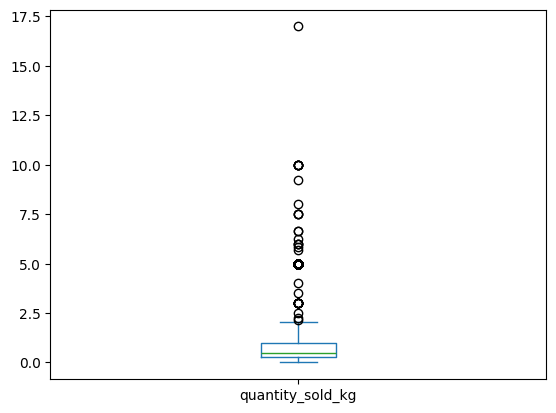

In [295]:
# visualise processed sold amount
df['quantity_sold_kg'].plot.box()

In [296]:
df = df[df['quantity_sold_kg'] < 2]

<Axes: >

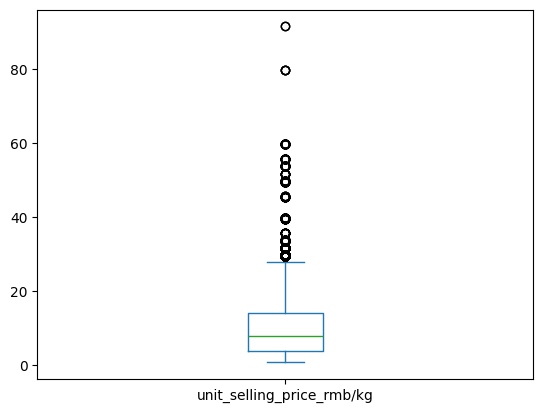

In [297]:
# visualise unit selling price
df['unit_selling_price_rmb/kg'].plot.box()

In [298]:
# rare items
df = df[df['unit_selling_price_rmb/kg'] < 75]

<Axes: >

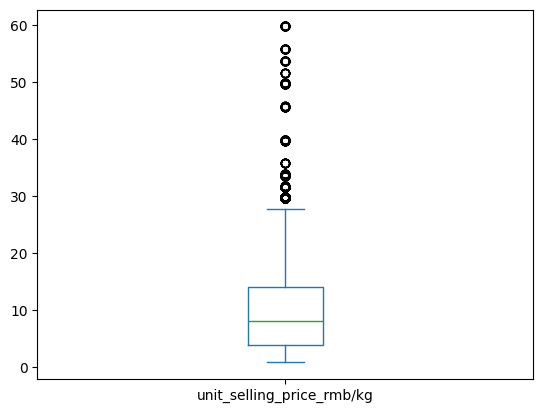

In [299]:
# visualise unit selling price
df['unit_selling_price_rmb/kg'].plot.box()

In [300]:
# view co-relation between price and sold amount
df.loc[:,['unit_selling_price_rmb/kg', 'quantity_sold_kg']].corr()

,unit_selling_price_rmb/kg,quantity_sold_kg
unit_selling_price_rmb/kg,1.000000,-0.582715
quantity_sold_kg,-0.582715,1.000000


<Axes: xlabel='unit_selling_price_rmb/kg', ylabel='quantity_sold_kg'>

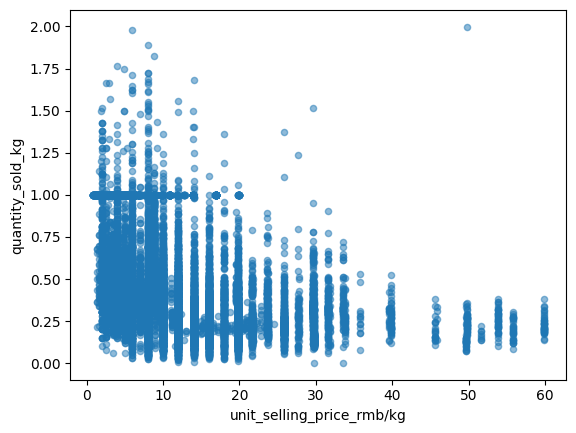

In [301]:
# visualise relation between price and sold amount
df.plot.scatter(x = 'unit_selling_price_rmb/kg', y = 'quantity_sold_kg', alpha = 0.5)

In [302]:
df = df.drop(columns=['year'])
df['item_name'].unique().shape[0]

123

In [303]:
# one hot encoding
df = pd.get_dummies(df)
df.shape

(24524, 134)

In [304]:
df.sample(3)

,time,month,day,quantity_sold_kg,unit_selling_price_rmb/kg,item_name_7 colour pepper,item_name_agaricus bisporus,item_name_aihao,item_name_amaranth,item_name_basil,...,item_name_yuxingcao,item_name_zhijiang red bolt,item_name_zhimaxiancai,item_name_zhuyecai,category_name_aquatic,category_name_cabbage,category_name_capsicum,category_name_flower,category_name_mushroom,category_name_solanum
20325,17,1,23,0.401,8.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
17503,10,6,12,0.465,8.0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
18589,10,11,16,1.000,8.8,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [305]:
# save pre-processed dataset
df.to_csv('pre_processed_dataset.csv', index=False)